### Brain extraction(Skull stripping)

**Learning outcomes:**
- How to do brain extraction using registration.

In [2]:
%matplotlib inline

import os
from helpers import *

import ants
# noinspection PyPep8Naming
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.5.4
SimpleITK version = 2.4.1


In [3]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = /home/younes/PycharmProjects/MRI-preprocessing-techniques


In [4]:
raw_examples = [
    'fsl-open-dev_sub-001_T1w.nii.gz',
    'wash-120_sub-001_T1w.nii.gz',
    'kf-panda_sub-01_ses-3T_T1w.nii.gz',
    'listen-task_sub-UTS01_ses-1_T1w.nii.gz',
]

#### Raw Image

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

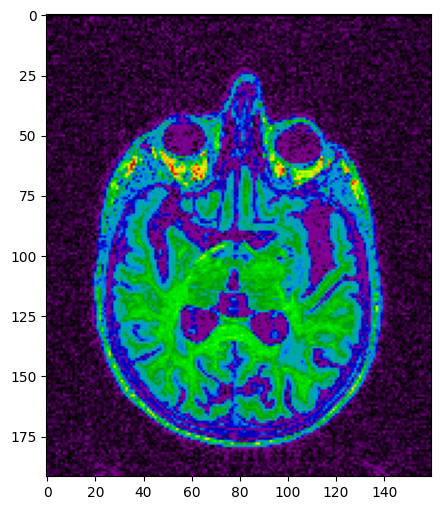

In [5]:
raw_example = raw_examples[0]
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', raw_example)
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL')

explore_3D_array(arr=raw_img_ants.numpy(), cmap='nipy_spectral')

### Template based method (Native space)

#### Template Image

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

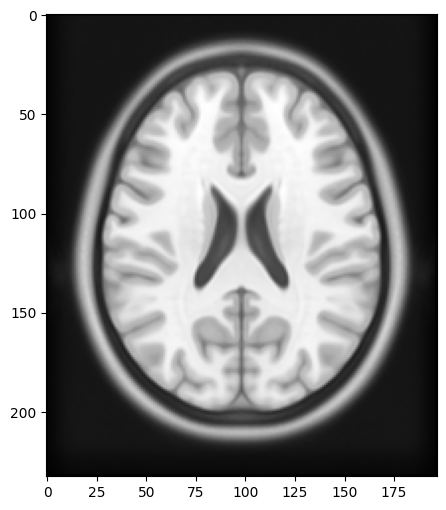

In [6]:
template_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a.nii')
template_img_ants = ants.image_read(template_img_path, reorient='IAL')

explore_3D_array(arr = template_img_ants.numpy())

#### Brain Mask of the template

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

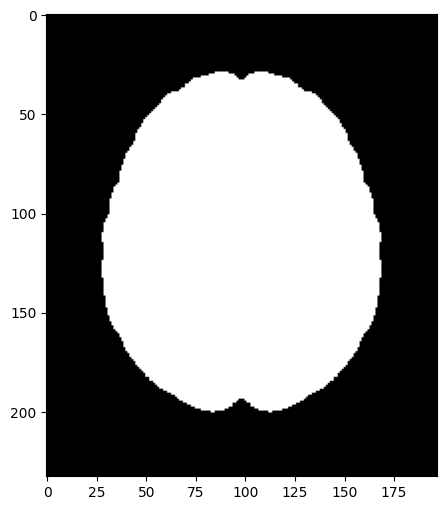

In [7]:
mask_template_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a_mask.nii')
mask_template_img_ants = ants.image_read(mask_template_img_path, reorient='IAL')

explore_3D_array(mask_template_img_ants.numpy())

In [8]:
np.unique(mask_template_img_ants.numpy())

array([0., 1.], dtype=float32)

#### Register template to raw image

In [9]:
transformation = ants.registration(
    fixed=raw_img_ants,
    moving=template_img_ants, 
    type_of_transform='SyN',
    verbose=True
)

antsRegistration -d 3 -r [0x78aadc525b08,0x78aadc525a48,1] -m mattes[0x78aadc525b08,0x78aadc525a48,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x78aadc525b08,0x78aadc525a48,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/tmp/tmp4a8bhk53,0x78aadc5268e8,0x78aadc526728] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x78aadc525b08 and moving image: 0x78aadc525a48 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x78aadc525b08
  moving image: 0x78aadc525a48
  fixed image: 0x78aadc525b08
  moving image: 0x78aadc525a48
D

In [10]:
print(transformation)

{'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/tmp/tmp4a8bhk531Warp.nii.gz', '/tmp/tmp4a8bhk530GenericAffine.mat'], 'invtransforms': ['/tmp/tmp4a8bhk530GenericAffine.mat', '/tmp/tmp4a8bhk531InverseWarp.nii.gz']}


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

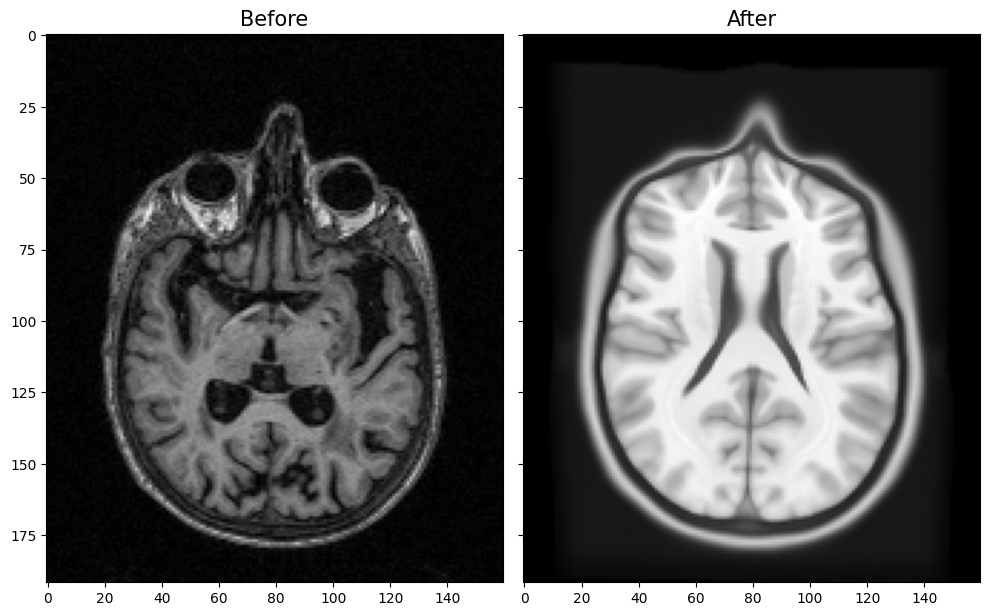

In [11]:
registered_img_ants = transformation['warpedmovout']

explore_3D_array_comparison(
    arr_before=raw_img_ants.numpy(), 
    arr_after=registered_img_ants.numpy()
)

#### Apply the generated transformations to the mask of template

In [12]:
brain_mask = ants.apply_transforms(
    fixed=transformation['warpedmovout'],
    moving=mask_template_img_ants,
    transformlist=transformation['fwdtransforms'],
    interpolator='nearestNeighbor',
    verbose=True
)

['-d', '3', '-i', '0x78aadbb92288', '-o', '0x78ab35743668', '-r', '0x78aadc524268', '-n', 'nearestNeighbor', '-t', '/tmp/tmp4a8bhk531Warp.nii.gz', '-t', '/tmp/tmp4a8bhk530GenericAffine.mat']
Using double precision for computations.
Input scalar image: 0x78aadbb92288
Could not create ImageIO for the input file, assuming dimension = 3 and scalar pixel type
Reference image: 0x78aadc524268
The composite transform comprises the following transforms (in order): 
  1. /tmp/tmp4a8bhk530GenericAffine.mat (type = AffineTransform)
  2. /tmp/tmp4a8bhk531Warp.nii.gz (type = DisplacementFieldTransform)
Default pixel value: 0
Interpolation type: NearestNeighborInterpolateImageFunction
Output warped image: 0x78ab35743668


interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

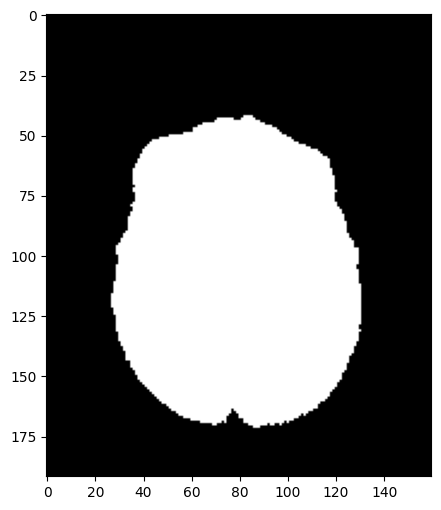

In [13]:
explore_3D_array(brain_mask.numpy())

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

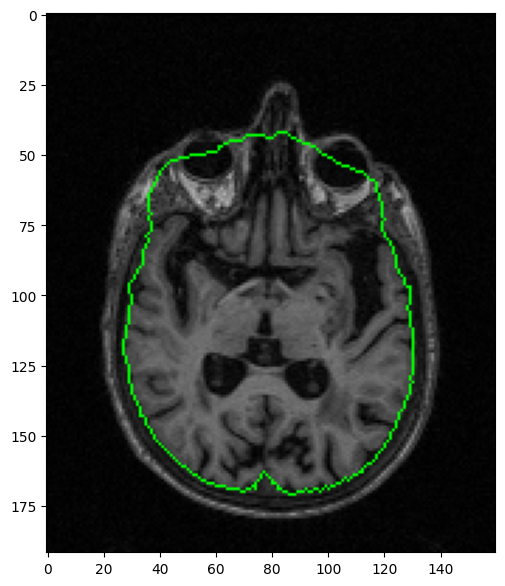

In [14]:
explore_3D_array_with_mask_contour(raw_img_ants.numpy(), brain_mask.numpy())

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

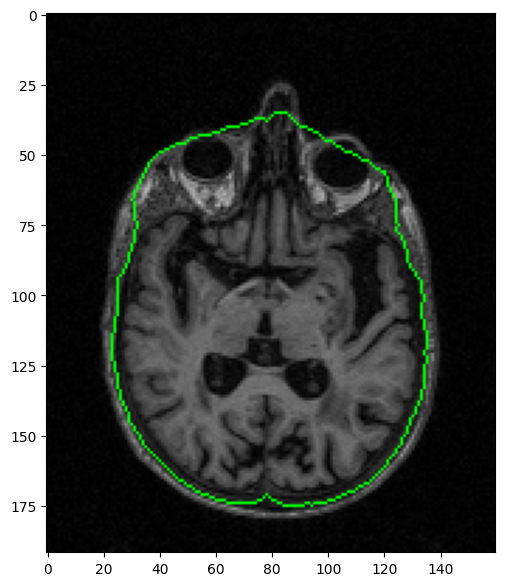

In [15]:
brain_mask_dilated = ants.morphology(brain_mask, radius=4, operation='dilate', mtype='binary')

explore_3D_array_with_mask_contour(raw_img_ants.numpy(), brain_mask_dilated.numpy())

#### Save brain mask

In [16]:
out_folder =  os.path.join(BASE_DIR, 'assets', 'preprocessed')
out_folder = os.path.join(out_folder, raw_example.split('.')[0]) # create folder with name of the raw file
os.makedirs(out_folder, exist_ok=True) # create folder if not exists

out_filename = add_suffix_to_filename(raw_example, suffix='brainMaskByTemplate')
out_path = os.path.join(out_folder, out_filename)

print(raw_img_path[len(BASE_DIR):])
print(out_path[len(BASE_DIR):])

/assets/raw_examples/fsl-open-dev_sub-001_T1w.nii.gz
/assets/preprocessed/fsl-open-dev_sub-001_T1w/fsl-open-dev_sub-001_T1w_brainMaskByTemplate.nii.gz


In [17]:
brain_mask_dilated.to_file(out_path)

#### Generate brain masked

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

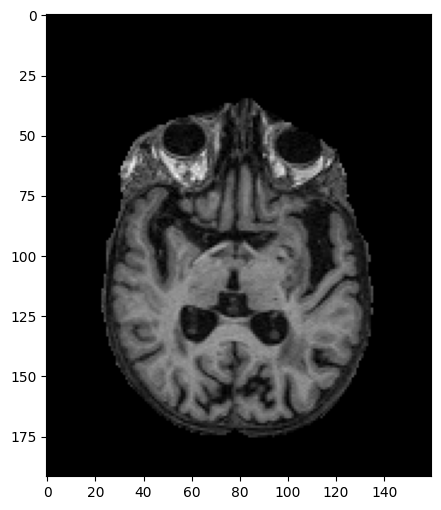

In [18]:
masked = ants.mask_image(raw_img_ants, brain_mask_dilated)

explore_3D_array(masked.numpy())

In [19]:
out_filename = add_suffix_to_filename(raw_example, suffix='brainMaskedByTemplate')
out_path = os.path.join(out_folder, out_filename)

print(raw_img_path[len(BASE_DIR):])
print(out_path[len(BASE_DIR):])

/assets/raw_examples/fsl-open-dev_sub-001_T1w.nii.gz
/assets/preprocessed/fsl-open-dev_sub-001_T1w/fsl-open-dev_sub-001_T1w_brainMaskedByTemplate.nii.gz


In [20]:
masked.to_file(out_path)